In [3]:
import matplotlib.pyplot as plt
import json
from Paras_nb import Para
import numpy as np
import seaborn as sn
import pandas as pd
import os

# Full Songs

In [4]:
output_file_path = 'cnnTest_guitar.json'

# output_file_path = 'CnnModel_guitar_JohnAll_128.json'


In [6]:
with open(Para.LOG_SAVE_FOLD + output_file_path, 'r') as f:  # changed to guitar file
    cnnTest = json.load(f)
# with open(Para.LOG_SAVE_FOLD + 'crnnTest.json', 'r') as f:
#     crnnTest = json.load(f)
# with open(Para.LOG_SAVE_FOLD + 'lcrnnTest.json', 'r') as f:
#     lcrnnTest = json.load(f)

In [7]:
z = cnnTest.values


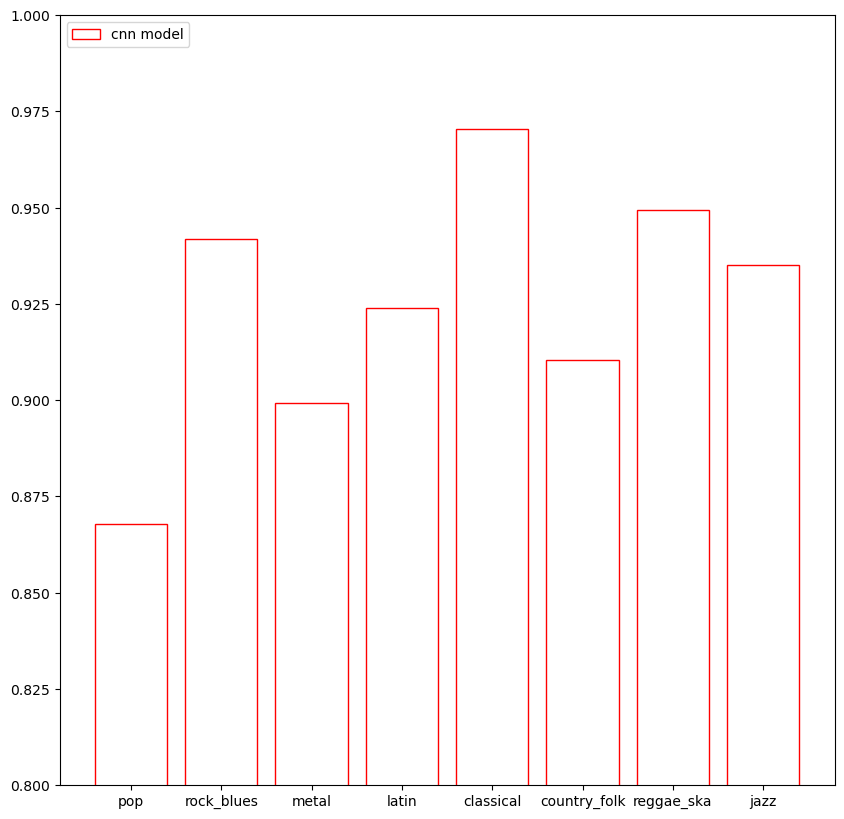

In [10]:
plt.figure(figsize=(10, 10))
plt.bar(range(len(cnnTest)), cnnTest.values(), 
        align='center', 
        color= (0,0,0,0),
        edgecolor = 'r',
        label='cnn model')

# plt.bar(range(len(crnnTest)), crnnTest.values(), 
#         align='center', 
#         color=(0,0,0,0),
#         edgecolor = 'b',
#         label='crnn-I model')

# plt.bar(range(len(lcrnnTest)), lcrnnTest.values(), 
#         align='center', 
#         color=(0,0,0,0),
#         edgecolor = 'g',
#         label='crnn-II model')

plt.xticks(range(len(cnnTest)), cnnTest.keys())
plt.ylim(0.8, 1.0)
plt.legend(loc="upper left")
plt.show()

# Training

In [36]:
with open(Para.LOG_SAVE_FOLD + output_file_path, 'r') as f: #changed to guitar file
    cnn = json.load(f)
# with open(Para.LOG_SAVE_FOLD + 'CrnnModel.json', 'r') as f:
#     crnn = json.load(f)
# with open(Para.LOG_SAVE_FOLD + 'CrnnLongModel.json', 'r') as f:
#     lcrnn = json.load(f)

## Loss

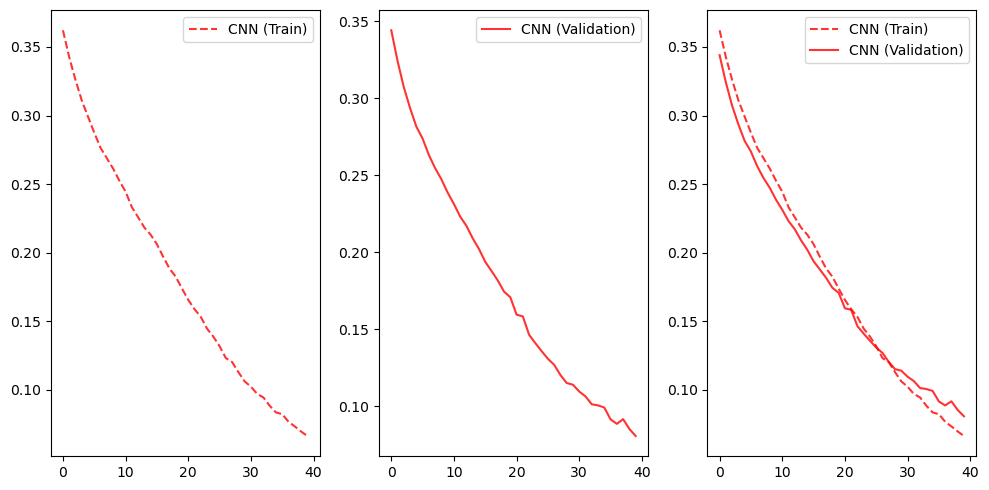

In [37]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(cnn['train_loss'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_loss'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_loss'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.legend(loc="upper right")
plt.subplot(1, 3, 2)
plt.plot(cnn['valid_loss'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_loss'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_loss'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="upper right")
plt.subplot(1, 3, 3)
plt.plot(cnn['train_loss'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_loss'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_loss'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.plot(cnn['valid_loss'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_loss'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_loss'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig(
    '/Users/seanlevine/GT/Results/Result-April-2023-128/loss.png')
plt.show()


## Accuracy

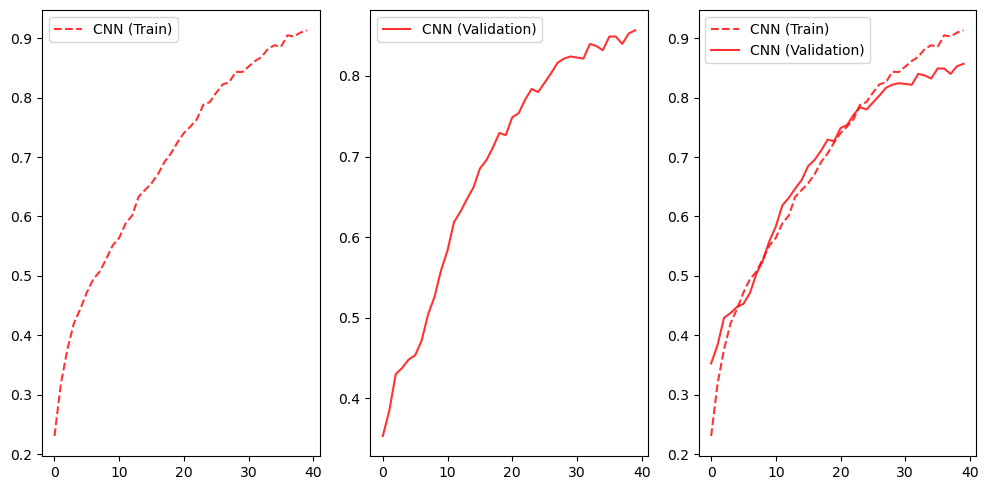

In [38]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(cnn['train_accu'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_accu'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_accu'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.legend(loc="best")
plt.subplot(1, 3, 2)
plt.plot(cnn['valid_accu'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_accu'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_accu'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="best")
plt.subplot(1, 3, 3)
plt.plot(cnn['train_accu'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_accu'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_accu'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.plot(cnn['valid_accu'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_accu'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_accu'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="best")
plt.tight_layout()
plt.savefig(
    '/Users/seanlevine/GT/Results/Result-April-2023-128/acc.png')
plt.show()



# Confusion Matrix

In [3]:
# cnn_m, crnn_m, lcrnn_m = np.zeros((10, 10)), np.zeros((10, 10)), np.zeros((10, 10))
cnn_m = np.zeros((8,8))  # changed to 8 instead of 10

In [4]:
with open(Para.LOG_SAVE_FOLD + 'CnnMatrix_guitar_JohnAll_128.json', 'r') as f: #changed to guitar file
    cnn_l = json.load(f)
# with open(Para.LOG_SAVE_FOLD + 'CrnnMatrix.json', 'r') as f:
#     crnn_l = json.load(f)
# with open(Para.LOG_SAVE_FOLD + 'CrnnLongMatrix.json', 'r') as f:
#     lcrnn_l = json.load(f)

In [5]:
for point in cnn_l:
    i, j = point
    cnn_m[i][j] += 1
    
# for point in crnn_l:
#     i, j = point
#     crnn_m[i][j] += 1

# for point in lcrnn_l:
#     i, j = point
#     lcrnn_m[i][j] += 1

In [6]:
cnn_m/=sum(cnn_m)
# crnn_m/=sum(crnn_m)
# lcrnn_m/=sum(lcrnn_m)

In [7]:
cnn_m

array([[0.81818182, 0.01098901, 0.        , 0.        , 0.        ,
        0.        , 0.05555556, 0.        ],
       [0.05194805, 0.91208791, 0.05555556, 0.05882353, 0.00704225,
        0.02469136, 0.01851852, 0.04705882],
       [0.02597403, 0.        , 0.88888889, 0.        , 0.        ,
        0.        , 0.09259259, 0.        ],
       [0.01298701, 0.01098901, 0.        , 0.85294118, 0.        ,
        0.        , 0.        , 0.01176471],
       [0.07792208, 0.03296703, 0.03703704, 0.        , 0.96478873,
        0.07407407, 0.01851852, 0.04705882],
       [0.01298701, 0.02197802, 0.01851852, 0.04411765, 0.00704225,
        0.90123457, 0.01851852, 0.        ],
       [0.        , 0.01098901, 0.        , 0.01470588, 0.        ,
        0.        , 0.7962963 , 0.        ],
       [0.        , 0.        , 0.        , 0.02941176, 0.02112676,
        0.        , 0.        , 0.89411765]])

In [8]:
#insert code for recall and precision here
stats_path = '/Users/seanlevine/GT/Results/Result-April-2023-128/statistic_info_2.txt'


true_pos = np.diag(cnn_m)
false_pos = np.sum(cnn_m, axis=0) - true_pos
false_neg = np.sum(cnn_m, axis=1) - true_pos
num_classes = 8

precision = np.sum(true_pos / (true_pos + false_pos))/num_classes
recall = np.sum(true_pos / (true_pos + false_neg))/num_classes

f1 = 2*(precision*recall)/(precision+recall)
stats = "Precision: {}, \nRecall: {}, \nF1 Score: {}".format(precision, recall, f1)

f = open(stats_path, "w")
f.write(stats)
f.close()

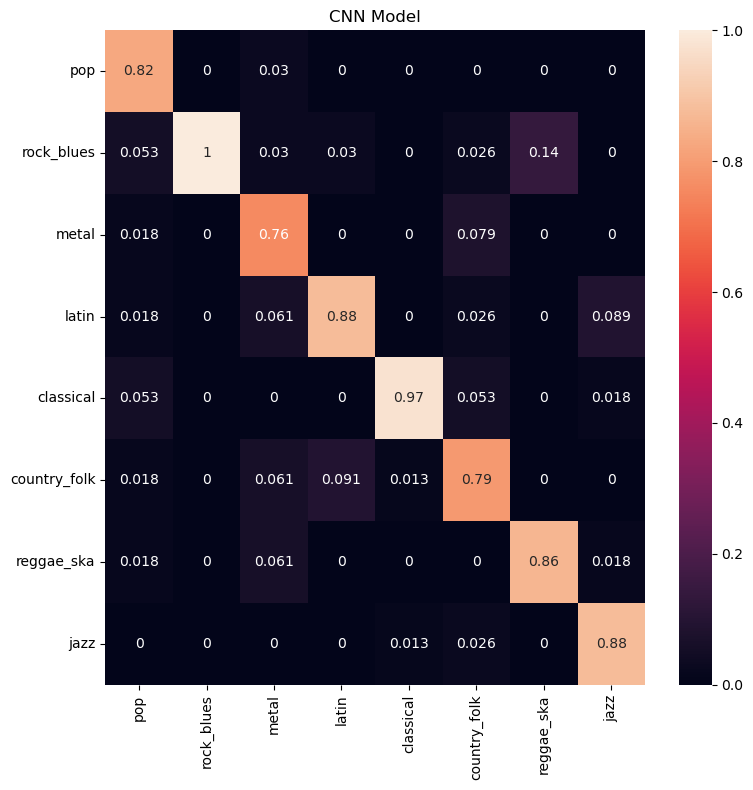

In [48]:
cnn_m = pd.DataFrame(cnn_m, index = [Para.dictionary.get(i) for i in range(8)],
                  columns = [Para.dictionary.get(i) for i in range(8)],) # changed to 8 instead of 10
# crnn_m = pd.DataFrame(crnn_m, index = [Para.dictionary.get(i) for i in range(10)],
#                   columns = [Para.dictionary.get(i) for i in range(10)],)
# lcrnn_m = pd.DataFrame(lcrnn_m, index = [Para.dictionary.get(i) for i in range(10)],
#                   columns = [Para.dictionary.get(i) for i in range(10)],)
plt.figure(figsize=(8,8))
# plt.subplot(3, 1, 1)
plt.title('CNN Model')
sn.heatmap(cnn_m, annot=True,)
# plt.subplot(3, 1, 2)
# plt.title('CRNN-I Model')
# sn.heatmap(crnn_m, annot=True,)
# plt.subplot(3, 1, 3)
# plt.title('CRNN-II Model')
# sn.heatmap(lcrnn_m, annot=True,)
plt.tight_layout()
plt.savefig('/Users/seanlevine/GT/Results/Result-April-2023-128/confusion_matrix.png')
